## 5.  Improving model predictions through experimentation (hyperparameter tuning)

The first predictions you make with a model are generally referred to as baseline predictions. The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

From a data perspective asks:
* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in missIng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:
* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the **hyperparameters** be tuned to make it even better?

**Note:** Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

Since we have two existing datasets, we'll come at exploration from a model perspective.

More specifically, we'll look at how we could improve our `RandomForestClassifier` and `RandomForestRegressor` models through hyperparameter tuning.

What even are hyperparameters?

Good question, let's check it out. First, we'll instantiate a `RandomForestClassifier`.

Now let's starts with importing the data from CSV format to data frame.

In [1]:
# import numpy and pandas to import data from csv format
import numpy as np, pandas as pd
heart_df = pd.read_csv('../data/heart-disease.csv')
# test if the import is working
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# check if there are NaN in the data frame
heart_df.isnull().sum().sum()

0

In [3]:
# Okay let's take a closer look
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# next we separate the target to features
heart_y = heart_df['target']
# meanwhile the X are all of the features
heart_X = heart_df.drop('target', axis=1)
# check it out
heart_y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
heart_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
# next we separate the X train, X test, y train and y test
# to do this we need to import sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split

# next before we use the library we need to set our random seed to have consistent result
np.random.seed(42)

# use the train_test_split to split the current model with 80:20 for the moment as for train : test portion.

heart_X_train, heart_X_test, heart_y_train, heart_y_test = train_test_split(heart_X, heart_y, test_size=.2)

In [7]:
# Check the data table shapes to ensure correct proportions
(heart_X_train.shape, heart_y_train.shape, heart_X_test.shape, heart_y_test.shape)

((242, 13), (242,), (61, 13), (61,))

As seen here the table shape is consistent as the train has 242 rows and the test has 61 rows

In [8]:
# Begin creating a model based on the sklearn.ensmeble.RandomForestCalssiier
from sklearn.ensemble import RandomForestClassifier
# put it into easier to write object
rfc = RandomForestClassifier()

rfc.fit(heart_X_train, heart_y_train)
rfc.score(heart_X_test, heart_y_test)

0.8524590163934426

Thus, the score parameter conclude the preparations. Next we will go to the Hyperparameters Tuning Section

### See available parameters
When setting the model algorithm using Random Forest Classifier above you are using the default hyperparameters. 

Now let's see all available parameters for the Random Forest Classifier: 

We call the model instance (`rfc` in this case) and use `get_params()`

In [9]:
# NOTE: get_params is a function thus to get the return not the object you need to add ():
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

You'll see things like `max_depth`, `min_samples_split`, `n_estimators`.

Each of these is a hyperparameter of the `RandomForestClassifier` you can adjsut.

You can think of hyperprameters as being similar to dials on a over. Ont he default setting your oven might do an okay job cooking your favorite meal. But with a little experimentation, you find it does better when you adjust the settings.

<img src="../images/sklearn-hyperparameter-tuning-oven.png" width=400/>

The same goes for improving a machine learning model by hyperparameter tuning. The default hyperparameters on a machine learning model may find patterns in data well. But, there's a chance by adjusting the hyperparameters may improve a model's performace.

Every machine learning model will have different hyperparameter you can tune.

Instead of memorizing all of the hyperparameters for every model, we'll see how it's done with one. And then knowing these principles, you can apply them to a different model if needed.

Reading the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Scikit-Learn documentation for the Random Forest</a>, you'll find they suggest trying to change `n_estimators` (the number of trees in the forest) and `min_samples_split` (the minimum number of samples required to split and internal node).

We'll try tuning these as well as:
* `max_features` (the number of features to consider when looking for the best split)
* `max_depth` (the maximum depth of the tree)
* `min_samples_leaf` (the minimum number of samples required to be at a lea node)

If this still sound like a lot, the good news is, the process we're talking with the Random Forest and tuning its hyperparameters, can be used for other machine learning models in Scikit-Learn. The only difference is, with a different model, the hyperparameters you tune will be different.

Adjusting hyperparameters is usually an experimental process to figure out which are best. As there's no real way of knowing which hyperparemters will be best when starting out.

To get familiar with hyperparameter tuning, we'll take our Random Forest Classifier and adjust its hyperparameters in 3 ways:
1. By hand
1. Randomly with <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html">RandomizedSearchCV</a>
1. Exhaustively with <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html"> GridSearchCV </a>

### 5.1 Tuning hyperparameters by hand

So far we've worked with training and test datasets.

You train a model on a training set and evaluate it on a test dataset.

But hyperparameter tuning introduces a third set, a validation set.

Now the process becomes: 
- train a model on the training data, 
- (try to) improve its hyperparameters on the validation set 
- evaluate it on the test dataset.

If our starting dataset contained 100 different patient records labels indicating who had heart disease and who didn't and we wanted to build a machine learning model to predict who had heart disease and who didn't, it might look like this:

<img src="../images/sklearn-train-valid-test-annotated.png" width=500/>

Since we know we're using a `RandomForestClassifier` and we know the hyperparameters we want to adjust, let's see what it looks like.

First, let's remind ourselves of the base parameters.

In [10]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

And we're going to adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

We'll use the same code as before, except this time we'll create a training, validation and test split.

With the training set containing 70% of the data and the validation and test sets each containing 15%.

Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluation function.

In [11]:
# I need to import some libs from the sklearn.metrics to compare the hyperparameter tunings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_hyper(y_true, y_preds):
    """  
    Performs evaluation comparison on y_true vs y_preds labels.
    """
    # set the metrics used to evaluate the model performance after tuning
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    # put all of them into dictionary which make it easier to call and evaluate later on
    metric_dict = {"accuracy" : round(accuracy, 2), 
                    "precision" : round(precision, 2),
                    "recall" : round(recall, 2),
                    "f1" : round(f1, 2)}
    
    # print the result (for testing meaybe):
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict
    

In [12]:
# Now let's run the scoring to provide comparison parameters
# we already import accuracy_score, precision_score, recall_score, f1_score
# rfc = RandomForestClassifiers
# re-seed the random generator
np.random.seed(42)

# shuffle the data
heart_df = heart_df.sample(frac=1)
# more about pandas.dataframe sample Methods: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html#pandas.DataFrame.sample

# Basically we are picking random sample from the heart_df but with frac = 1 we take all data as sample but at random
# this is the same as randomizing the original heart_df data frame.

# Now we re-doing the same steps on modelling data:
# Split into X and y:
heart_X = heart_df.drop("target", axis=1)
heart_y = heart_df["target"]

# Now we need to separate them into : train, validation, and test data
# we use the set train = 70% of data, validation = 15% of data and test = 15% of data
train_split = round(0.7 * len(heart_df)) # 70 % of the whole data: NOTE: we only take the length NOT the data
validation_split = round(train_split + 0.15 * len(heart_df)) # 15% of the whole length of heart_df used for validation

# use those split numbers to pick the sampele from X and y (data from index 0 to train_split)
heart_X_train, heart_y_train = heart_X[:train_split], heart_y[:train_split]
# for the validation data remember the index starts from train_split to validation split
heart_X_validation, heart_y_validation = heart_X[train_split : validation_split], heart_y[train_split : validation_split]
# thus the rest (index validation_split to end) is the test part:
heart_X_test, heart_y_test = heart_X[validation_split:], heart_y[validation_split:]

# now we will use the validation to test the model developed from train portion of the data
rfc.fit(heart_X_train, heart_y_train)
# now we make prediction with the fitted rfc:
heart_y_pred = rfc.predict(heart_X_validation)

# Now we have the heart_y_pred which resulted from model RFC so we can score it against the heart_y_validation
# since we use heart_X_validation portion to make these predictions:
# Oh to make all process faster we already make function evaluate_hyper to print out the result
heart_baseline_metrics = evaluate_hyper(heart_y_validation, heart_y_pred)
heart_baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

Now we have the **Baseline metrics** as parameter that can be compared when we make changes into hyperparameter.

Let's start with tuning the most common hyperparamter in Random Forest Classifier which is number estimator (tree in the forest) (n_estimator), find out more on [sklearn.ensamble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [13]:
# we already import sklear.ensemble.RandomforestClassiier 
# we make the second instance model of this and name it rfc_2 to differentiate prior rfc

rfc_2 = RandomForestClassifier(n_estimators=100)
# we use n_estimator as 100

# using the train and validation data we crate the model 
rfc_2.fit(heart_X_train, heart_y_train)
# using this model to make prediction using heart_X_validation data:
heart_y_pred_2 = rfc_2.predict(heart_X_validation)

# evaluate using the 2nd RFC model:
rfc_2_metrics = evaluate_hyper(heart_y_validation, heart_y_pred_2)
rfc_2_metrics

Acc: 84.44%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

The result is slightly bad, but the journey is still long, there are still many value for n_estimator.

Also how about other hyperparamters ready to be tuned?

Also we haven't use the test portion of the data....

However, one thing is clear... using this kind of manual by hand workflow is not practical. We need better method to tune broad range of hyperparameters.

### 5.2 Hyperparameter tunign with [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Scikit-Learn's [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) allows us to randomly search accross different hyperparameters to see which work best. It also stores details about the ones which work best!

Let's see it in action

**PAY ATTENTION EACH COMMENT WHICH HAS STEP BY STEP PROCEDURES**

In [14]:
# First, we make grid (dictionary) of hyperparameters we'd like to search over.
# KEY: name of Hyperparameter VALUE: list of values to be tested

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth" : [None, 5, 10, 20, 30],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1,2,4]
}


Where did these values come from?

They're made up.

Well, Not completely pulled out of the air though. It has some consideration after reading [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). You will see some of these values have certain importance which usually perform well and certain hyperparameters take strings rather than integers.

Now we have got the grid setup. Scikit-Learn's [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) will look at it, pick a random value from each, instantiate a model with those values and test each model.

How many model will it test?

As many as there are for each combination of hyperparameters to be tested. Let's add them up.

`max_depth` has 4, `max_features` has 2, `min_samples_leaf` has 3, `min_samples_split` has 3, `n_estimators` has 5, Thus considering all it has 4 x 2 x 3 x 3 x 5 = 360 models!

Or... 

We can set the [n_iter](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#:~:text=n_iterint%2C%20default,of%20the%20solution.) parameter to limit the number of models [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) tests.

The best thing? The result we get will be cross-validated (hence the CV in [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)) so we can use [train_test_spit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).

NOTE: and since we are going over so many different models, we will set then [n_jobs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#:~:text=if%20bootstrap%3DTrue.-,n_jobs,-int%2C%20default%3DNone) for the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) so Scikit-Learn takes advantage of all the cores (processors) on your computers.

Let's see it in action.

WARNING: Depending on the [n_iter](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#:~:text=n_iterint%2C%20default,of%20the%20solution.) (how many models you test), the different values in the hyperparameter grid, and the power of your computer, running the cell below may take a while.

WARNING: Setting [n_jobs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#:~:text=if%20bootstrap%3DTrue.-,n_jobs,-int%2C%20default%3DNone)= -1 seemes to be breaking on some machines (this example is first run in 8 December 2019). There seems to be an issue about it being tracked in GitHub. If so in this example [n_jobs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#:~:text=if%20bootstrap%3DTrue.-,n_jobs,-int%2C%20default%3DNone)= 1 seems to be working.

In [15]:

# first import the RandomizedSearchCV from Sklearn.model_selection:
from sklearn.model_selection import RandomizedSearchCV

# we already import the train_test_split
# WARNING: we set the splits before (manually) to implement tuning by hand thus split to train and test must be restart
# PROOF:
(heart_X.shape, heart_X_train.shape, heart_X_test.shape)

((303, 13), (212, 13), (46, 13))

WARNING: from the result above the shape of data, we can see the number of rows in the whole data is not equals to the sum of the number of rows for train and test.

This is because we use some of the data for validation last time we want to use manuall tuning by hand.

I need to restart the split to before using RandomSearchCV

In [16]:
# SEED RANDOM
np.random.seed(42)

# RE-split into train and test
heart_X_train, heart_X_test, heart_y_train, heart_y_test = train_test_split(heart_X, heart_y, test_size=0.2)
(heart_X.shape, heart_X_train.shape, heart_X_test.shape)

((303, 13), (242, 13), (61, 13))

Now, the number of rows for all data is equal to the number of rows for train and test. 

In [17]:
# now we are ready to set the RandomForestClassifier wiht n_jobs = -1
rfc_full_cores = RandomForestClassifier(n_jobs=-1)

# setup the RandomSearchCV
random_search_rfc_full_cores = RandomizedSearchCV(
    estimator=rfc_full_cores,
    param_distributions=grid, # I am using the dictionary grid we created earlier
    n_iter=20, # try 20 models total (from actually 360)
    cv=5,  # 5 fold cross validation
    verbose=2 #print out the result
)

# fit the RandomSearchCV version of the RFC
random_search_rfc_full_cores.fit(heart_X_train, heart_y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

WARNING: there are many WARNING regarding the `max_features=auto` that will be removed in 1.3 while it is alrady deprecated.

In the [max_features](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#:~:text=is%20not%20provided.-,max_features,-%7B%E2%80%9Csqrt%E2%80%9D%2C%20%E2%80%9Clog2%E2%80%9D%2C%20None) documentation it said that the `auto` means `sqrt`. There are also `log2` if we want real comparison. So I use `log2` also as consideration for Hyperparameter tuning. 

Btw, `n_jobs` = -1 for the RandomForestClassifer works this time. If in the future this is failing then just use `n_jobs` = 1

In [18]:
# find the best hyperparamters found by RandomizedSearchCV
random_search_rfc_full_cores.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

The result is still using `sqrt` as the best `max_features` which is nowadays the default when you choose `max_features` = auto

Now wehen we call `precdict()` function on the random_search_rfc_full_cores version of our classidier, it will use the best hyperparameter mentioned above.

In [19]:
# Make prediction with the best hyperparameters
random_search_rfc_full_cores_y_preds = random_search_rfc_full_cores.predict(heart_X_test)

# Evaluate using our fucntion evaluate_hyper(heart_y_test, random_search_rfc_full_cores_y_preds)
random_search_metrics = evaluate_hyper(heart_y_test, random_search_rfc_full_cores_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


Excellent! Thanks to `RandomSearchCV` testing out a bunch of different hyuperparameters, we get a nice boost to all of the eveluateion metrics for our classification model.

There's one more way we could try to imporve our model's hyperparameters. And it's with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### 5.3 Hyperparameter Tuning with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The main difference between [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) is [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) searches across a grid of hyperparameters exahustively, where as, [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) searches across a grid hyperparameters randomly (stopped after `n_iter` combinations).

For example, let's see our grid of hyperparamters.

In [20]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

[RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html try `n_iter` combinations of different values. Where as, [GridSewarchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) will try every single possible combinations.

If you remember from begore when we did the calculation: `max_depth` has 4, `max_features` has 2, `min_samples_leaf` has 3, `min_samples_split` has 3, `n_estimators` has 5.

That will be 4x2x3x3x5 = 360 models!

This coulf take a long time depending on the power of the comuter used, the amount of data you have and the complexity of the hyperparameters (usually higher values means more complex models).

In our case, the data we're using is relatively small (only ~ 300 samples).

since we've already tried to find some ideal hyperparameters using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), we will create another hyperparameter grid based on the `random_search_rfc_full_cores.best_params_` with less options and then try to use [GridSewarchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find more ideal set.

Note: Based on the `random_search_rfc_full_cores.best_params_` implies that next set of hyperparamters we will try are roughly in the same range of the best set found by [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [21]:
# revisist RandomizedSearchCV results
random_search_rfc_full_cores.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

In [22]:
# from this result let's test more thorough:
grid_2 = {
    'n_estimators': [1200, 1500, 2000], # n_estimators suggest bigger is better
    'max_depth': [None, 5, 10], # seems shallower better (suggest 10)
    'max_features': ['sqrt',], # seems like not very much changes in this matter so just choose default sqrt
    'min_samples_split': [4, 6], # test which is better wieght to bigger is better (suggest 6)
    'min_samples_leaf': [1,2] # suggest in the top but why do we test below that? (suggest 4)
}

We've created another grid of hyperparameters to search over, this time less total.

`n_estimators` has 3, `max_depth` has 3, `max_features` has 1, `min_samples_leaf` has 2, `min_samples_split` has 2. 

That will be 3x3x1x2x2 = 36 models which is about 10 times less (360/36) combinations of hyperparametes than our first grid.

Now, when we run [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), passing it our classifier model (`rfc__full_cores`), parameter grid (`grid_2`) and the number of cross-validation folds we would like to use (`cv`) it will create model with every single combination of hyperparamteres 36 in total, and check the results.

In [23]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# we already imported train_test_split

# seed the random
np.random.seed(42)

# we already resplit into train and test sets with the same seed 42 we will just use them
# we already instantiate the RandomForestClassifier with full core in seed 42 we will just use that rfc_full_cores
# the main difference here is the param_grid and cv
# with verbose = still using 2 which means print each top steps
grid_search_rfc_full_cores = GridSearchCV(
    estimator=rfc_full_cores,
    param_grid=grid_2,
    cv=5, # 5 fold cross validation
    verbose=2 #print out progress
)

# fit the estimator with train data:
# NOTE: this command must present to initiate the gridSearchCV:
grid_search_rfc_full_cores.fit(heart_X_train, heart_y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_s

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6],
                         'n_estimators': [1200, 1500, 2000]},
             verbose=2)

Okay, it takes araound 2,5 minutes total. However in the latest VisualStudio Jupyter Notebook the result is more succinct with only present HTML like image on sumary commands and param_grid.

Now to see the parameters (the best) resulted byt GridSearchCV as usual we use `best_params_` method.

In [24]:
# check the best params according to GridSearchCV
grid_search_rfc_full_cores.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1500}

In [25]:
# Now use the parameters to make prediction and measure their metrics
grid_search_rfc_full_cores_y_preds = grid_search_rfc_full_cores.predict(heart_X_test)

# evaluate
grid_search_metrics = evaluate_hyper(heart_y_test, grid_search_rfc_full_cores_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


To make it easier to see the comparison between hyperparameters tuning we create histogram bar by creating data frame on baseline, manual, random search and grid search evaluate parameters.

<AxesSubplot:>

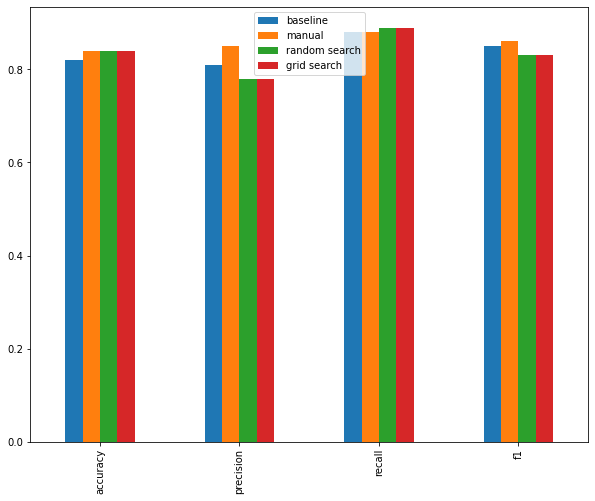

In [26]:
# create data frame comparing metrics from all hyperparameter tuning methods:
# heart_baseline_metrics: baseline before any tuning
# rfc_2_metrics : manual by hand tuning
# random_search_metrics: random search CV tuning
# grid_search_metrics: grid search CV tuning

# we already imported pandas as pd and using dictionary as data type to build Data Frame using pandas
compare_metrics = pd.DataFrame({
    "baseline": heart_baseline_metrics,
    "manual": rfc_2_metrics,
    "random search": random_search_metrics,
    "grid search": grid_search_metrics
})

# plot the Data Frame as bar plot:
compare_metrics.plot.bar(figsize=(10,8))

To be honest, the result of RandomizedSearchCV and GridSearchCV are not better than manual or even the baseline for that matter. 

This kind of things might happen. But it's important to remember, it's not over. There may be more we can do.

In a hyperparameter tuning sense, there my be a better set we could find throught more extensive searching with RandomizedSearchCVa and GridSearchCV but it's likely these improvements will be marginal.

A few ideas you could try :

* collecting more data - Based on the resutls our models are having now, it seems they're finding some patterns. Collecting more data may inmprove a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on. 
* Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as [XGBoost](https://xgboost.ai/) or [CatBoost](https://catboost.ai/) might perform better.

Since machine learning is part engineering part schience these kind of experiments are common place in any machine learning project.

Now. you've got a somewhat tuned Random Forest mode, the next thing you might want to do is export it and save it so you could share it with your team or use it in an application without havei to retrain it. 

TODO: determine if we need separate file to do this?? If yes most likely we need to save as the file from this file since the saved things are in this files. Alternatively, we recalculate all steps as well as we retrain our brain in hyperparamter tuning and in thie end we export and save them.

## 6. Saving and Loading trained machine learning models
Since our `GridSearchCV` model has the best result so far, we'll export it and save it to file.